# Logistic regression demo

In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

## 1 Toy example (use body height to predict male/female)

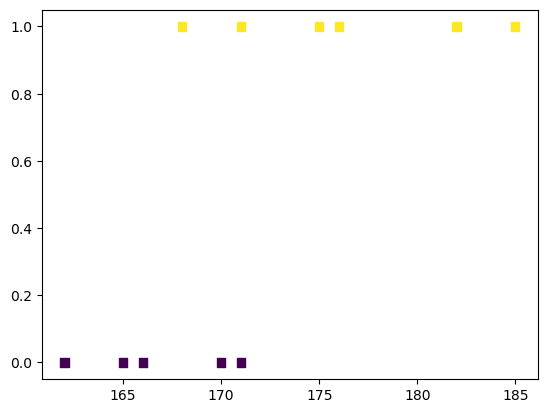

In [2]:
x = np.transpose(np.array([[162, 165, 166, 170, 171, 168, 171, 175, 176, 182, 185]]))
y = np.transpose(np.array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]]))

plt.scatter(x, y, c=y, marker='s');

In [3]:
?linear_model.LogisticRegression # show documentation

Object `linear_model.LogisticRegression # show documentation` not found.


In [4]:
LRmodel = linear_model.LogisticRegression(penalty=None).fit(x, y.ravel())
print(LRmodel.intercept_)  # location parameter (theta_0)
print(LRmodel.coef_)   # scale parameter (theta_1)

[-84.83327287]
[[0.49853637]]


In [5]:
prob = LRmodel.predict_proba(x)  # fitted probabilities [P(Y=0), P(Y=1)]
print(prob)

[[9.83215652e-01 1.67843477e-02]
 [9.29220235e-01 7.07797654e-02]
 [8.88571922e-01 1.11428078e-01]
 [5.20511180e-01 4.79488820e-01]
 [3.97367605e-01 6.02632395e-01]
 [7.46335655e-01 2.53664345e-01]
 [3.97367605e-01 6.02632395e-01]
 [8.23686343e-02 9.17631366e-01]
 [5.17042031e-02 9.48295797e-01]
 [2.73101936e-03 9.97268981e-01]
 [6.13354044e-04 9.99386646e-01]]


In [6]:
pred = LRmodel.predict(x)  # prediction of labels
print(pred)

[0 0 0 0 1 0 1 1 1 1 1]


In [7]:
pred.shape

(11,)

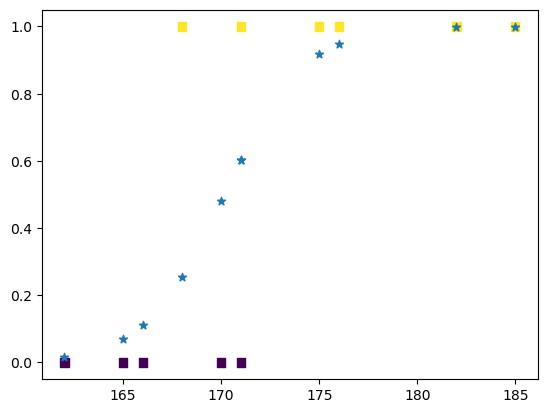

In [8]:
plt.scatter(x, y, c=y, marker='s');
plt.scatter(x,prob[:,1],marker='*');

# 2 Simulated data

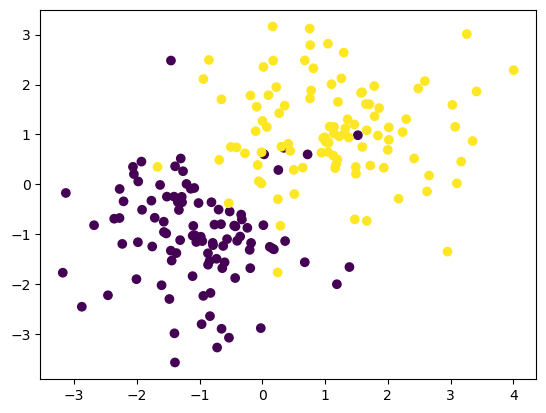

In [8]:
X1 = np.random.randn(100,2) + [-1,-1]
X2 = np.random.randn(100,2) + [1,1]
X = np.concatenate((X1, X2), axis=0)
truelabels = np.repeat([0,1], 100)
k = 2

n = X.shape[0]  # number of data points

plt.scatter(x=X[:,0], y=X[:,1], c=truelabels);   # plot the data

In [9]:
LRmodel = linear_model.LogisticRegression(penalty=None).fit(X, truelabels.ravel())
prob = LRmodel.predict_proba(X)  # fitted probabilities

In [10]:
LRmodel.coef_

array([[1.8669429 , 1.78815247]])

In [11]:
LRmodel.intercept_

array([0.05569381])

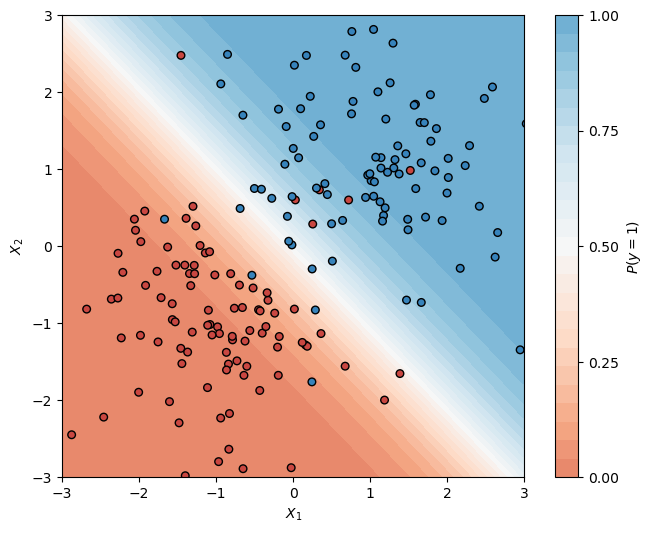

In [12]:
# Next, make a continuous grid of values and evaluate the probability of each (x, y) point in the grid:

xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LRmodel.predict_proba(grid)[:, 1].reshape(xx.shape)

# Now, plot the probability grid as a contour map and additionally show the test set samples on top of it:

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu", vmin=-0.5, vmax=1.5)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:,1], c=truelabels, s=30,
           cmap="RdBu", vmin=-0.25, vmax=1.25,
           edgecolor="black", linewidth=1);

ax.set(aspect="equal",
       xlim=(-3, 3), ylim=(-3, 3),
       xlabel="$X_1$", ylabel="$X_2$");